In [15]:
import numpy as np
import sys
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [16]:
class Point:
    def __init__(self, x, y):
        """Defines a point using its physical space coordinates"""
        self.x = x
        self.y = y
        self.hc = self.get_hc()
    @classmethod
    def from_hc(cls, hc):
        """Defines a point from its representation in homogeneous coordinates"""
        if np.isclose(hc[2],0):
            x = hc[0]
            y = hc[1]
        else:
            x = hc[0] / hc[2]
            y = hc[1] / hc[2]
        return cls(x, y)
    def get_hc(self):
        """Returns the point in homogeneous coordinates"""
        return np.array([self.x, self.y, 1])
    def __str__(self):
        """To string method for debugging"""
        return f"Point(x={self.x}, y={self.y}, hc={self.hc})"

In [17]:
class Line():
    def __init__(self, point1, point2):
        """Defines a line that passes through 2 points in the physical space"""
        assert isinstance(point1, Point) and isinstance(point2, Point), "A line should be created by 2 Points, or by its angle to the x-axis"
        self.hc = self.get_hc(point1, point2)
    @classmethod
    def from_angle(cls, angle, y_int):
        """Defines a line by its angle to the x-axis and y intercept"""
        intercept = Point(0, y_int) # Point1 is defined by the y-intercept
        point2 = Point(1, y_int + math.tan(math.radians(angle))) # Point 2 is the point on the line at x=1
        return cls(intercept, point2)
    def get_hc(self, point1, point2):
        """Returns the line in homogeneous coordinates"""
        slope = (point2.y - point1.y) / (point2.x - point1.x)
        c = point2.y - slope * point2.x
        return np.array([-slope, 1, -c])
    def __str__(self):
        return f"Line(algebraic={self.hc[1]} * y = {-self.hc[0]} * x + {-self.hc[2]}, hc={self.hc})"

In [65]:
inputs = ["(3,5)", "(5,3)", "(7,5)", 45]
# inputs = ["(-3,-5)", "(-5,-3)", "(-7,-5)", -135]
# inputs = ["(-8.76, 9.12)", "(-9.31, 6.58)", "(-7.25, 8.47)", -22.7]
# inputs = ["(0.5, -1)", "(4, -8)", "(5, -7.5)", 300]

Success, you have hit the target!


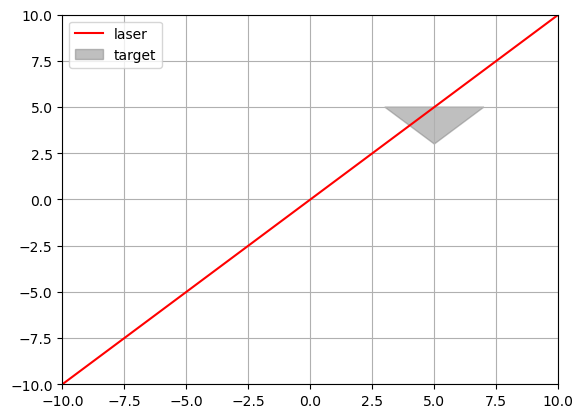

In [66]:
# Read arguments for triangle points & laser angle
triangle_points = []
for i in range(3):
    point_string = inputs[i].strip("()")
    x_str, y_str = point_string.split(",")
    triangle_points.append(Point(float(x_str), float(y_str)))
aiming_angle = inputs[3]

# Create laser line in hc
laser = Line.from_angle(aiming_angle, 0)

# Convert 2 triangle edges in hc
edge1 = Line(triangle_points[0], triangle_points[1])
edge2 = Line(triangle_points[1], triangle_points[2])

# Find the intersections:
intersect1_hc = np.cross(laser.hc, edge1.hc)
intersect2_hc = np.cross(laser.hc, edge2.hc)
p_of_int1 = Point.from_hc(intersect1_hc)
p_of_int2 = Point.from_hc(intersect2_hc)

# Check that the intersection fits within the domain defined by the triangle
# If the point of intersection fits, then print and exit, else keep look at the other edge
if p_of_int1.x < max(triangle_points[0].x, triangle_points[1].x) and p_of_int1.x > min(triangle_points[0].x, triangle_points[1].x):
    if p_of_int1.y < max(triangle_points[0].y, triangle_points[1].y) and p_of_int1.y > min(triangle_points[0].y, triangle_points[1].y):
        print("Success, you have hit the target!")
    else:
        pass
if p_of_int2.x < max(triangle_points[1].x, triangle_points[2].x) and p_of_int2.x > min(triangle_points[1].x, triangle_points[2].x):
    if p_of_int2.y < max(triangle_points[1].y, triangle_points[2].y) and p_of_int2.y > min(triangle_points[1].y, triangle_points[2].y):
        print("Success, you have hit the target!")
    else:
        print("Oh no, you missed the target!")
else:
    print("Oh no, you missed the target!")


# The following visualization is inspired by the resource included below: 
# https://stackoverflow.com/questions/44397105/how-to-draw-a-triangle-using-matplotlib-pyplot-based-on-3-dots-x-y-in-2d

# Generate values for the laser
x_values = np.linspace(-10, 10, 400)
y_values = -laser.hc[0] * x_values - laser.hc[2]

# Define the vertices of the triangle
triangle_vertices = np.array([triangle_points[0].hc[:2], triangle_points[1].hc[:2], triangle_points[2].hc[:2]])

# Generate the plot with the laser and triangle
fig, ax = plt.subplots()
ax.plot(x_values, y_values, "r", label="laser")
triangle = Polygon(triangle_vertices, closed=True, color="grey", alpha=0.5, label="target")
ax.add_patch(triangle)

# Organize visualization
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.grid(True)
ax.legend()
plt.show()
